In [ ]:
# Carregar o conjunto de dados
import pandas as pd
import gdown

# url da base de dados
url = 'https://drive.google.com/file/d/1HTR3DCwgKZLDgiCuYK6oilFPTOaa5SOj/view'
# nome do arquivo que vai ser gerado
output = 'Mall_Customers.csv'
# baixa os dados
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1HTR3DCwgKZLDgiCuYK6oilFPTOaa5SOj
To: /content/Mall_Customers.csv
100%|██████████| 4.29k/4.29k [00:00<00:00, 2.57MB/s]


'Mall_Customers.csv'

In [ ]:
data = pd.read_csv('Mall_Customers.csv', sep=',', parse_dates=True)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Pré-Processamento dos Dados
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
# Agrupamento Hierárquico Aglomerativo
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Aplicar Agrupamento Hierárquico Aglomerativo
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = agg.fit_predict(data)

labels = agg.labels_

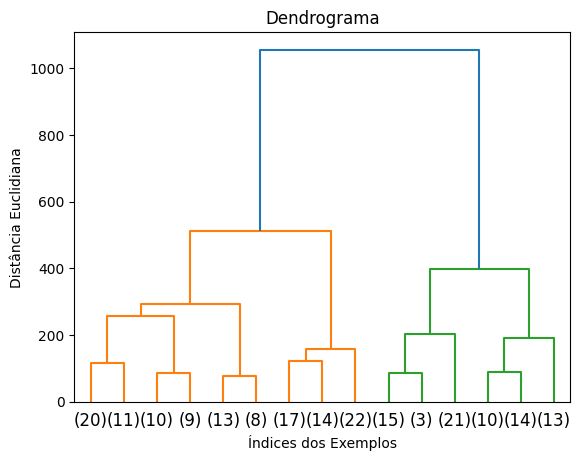

In [ ]:
# Visualização do Dendrograma
import matplotlib.pyplot as plt

linked = linkage(data, 'ward')

# columns = ["Genre", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
# for col in columns:
#   dendrogram(linked, labels=[x for x in data[col]], orientation='top', truncate_mode='lastp', p=15, distance_sort='descending', show_leaf_counts=True)

dendrogram(linked, labels=[x for x in data['Age']],
           orientation='top', truncate_mode='lastp', p=15,
           distance_sort='descending', show_leaf_counts=True)

# Ajusta o plot
# fig = plt.gcf()
# _ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
# fig.set_size_inches(108, 21)

title = "Dendrograma"

plt.title(title)
plt.xlabel('Índices dos Exemplos')
plt.ylabel('Distância Euclidiana')
plt.show()

In [ ]:
from statistics import mode

columns = ["Genre", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
for clst in range(1,4):
    members = data[clusters == clst][columns]
    clst_median = members.median()
    clst_mean = members.mean()
    clst_mode = mode(members['Genre'])
    print(f'Mediana do Cluster {clst}:\n{clst_median}\n')
    print(f'Média do Cluster {clst}:\n{clst_mean}\n')
    print(f'Moda do gênero Cluster {clst}: {clst_mode}\n')

Mediana do Cluster 1:
Genre                      0.0
Age                       32.0
Annual Income (k$)        79.0
Spending Score (1-100)    83.0
dtype: float64

Média do Cluster 1:
Genre                      0.461538
Age                       32.692308
Annual Income (k$)        86.538462
Spending Score (1-100)    82.128205
dtype: float64

Moda do gênero Cluster 1: 0

Mediana do Cluster 2:
Genre                      0.0
Age                       40.0
Annual Income (k$)        60.0
Spending Score (1-100)    49.0
dtype: float64

Média do Cluster 2:
Genre                      0.415094
Age                       39.150943
Annual Income (k$)        59.415094
Spending Score (1-100)    49.433962
dtype: float64

Moda do gênero Cluster 2: 0

Mediana do Cluster 3:
Genre                      1.0
Age                       41.0
Annual Income (k$)        81.0
Spending Score (1-100)    16.0
dtype: float64

Média do Cluster 3:
Genre                      0.513514
Age                       40.324324
Annu